In [100]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister, Aer, transpile
from qiskit.visualization import plot_histogram


In [2]:
all_documents = QuantumRegister(1, name="documents")
false_info = QuantumRegister(1, name="falsification")
wanted = QuantumRegister(1, name="wanted")
bribe = QuantumRegister(1, name="bribe")

In [87]:
ancilla_phase = AncillaRegister(1, name="phase")

In [42]:
output = ClassicalRegister(4, name="out")

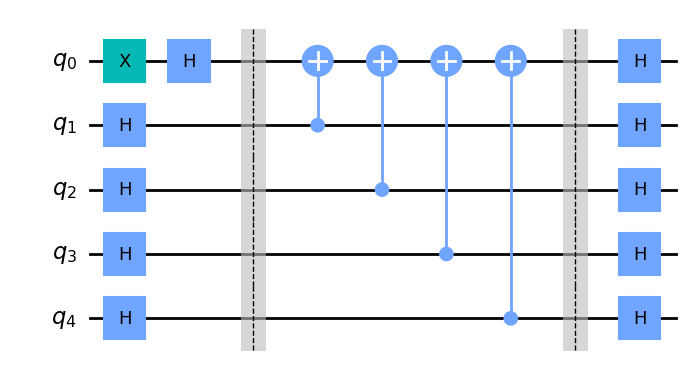

In [93]:
total_qubits = 5
oracle = QuantumCircuit(total_qubits, name="Uf")

oracle.x(0)
oracle.h(range(total_qubits))

oracle.barrier()

for i in range(1, total_qubits):
    oracle.cx(i, 0)

oracle.barrier()
    
oracle.h(range(total_qubits))
    
oracle.draw("mpl")

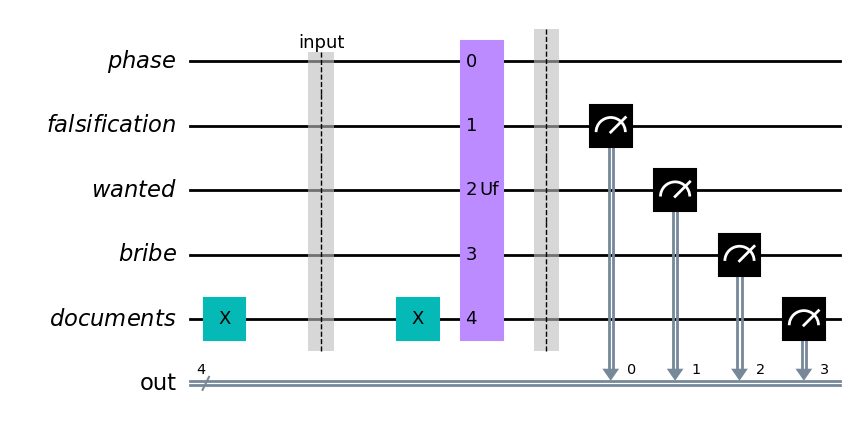

In [103]:
qc = QuantumCircuit(ancilla_phase, false_info, wanted, bribe, all_documents, output)

#qc.x(wanted)
#qc.x(bribe)
#qc.x(false_info)
qc.x(all_documents)

qc.barrier(label="input")

qc.x(all_documents)
qc.append(oracle, qc.qregs)
    
qc.barrier()

for out, register in enumerate(qregisters):
    qc.measure(register, out)


qc.draw("mpl")

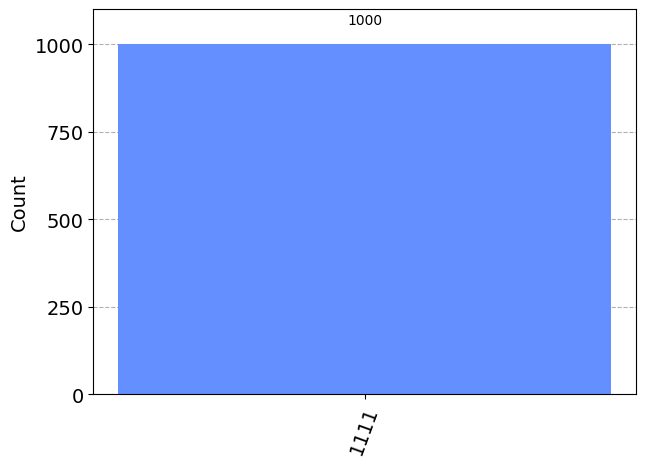

In [102]:
sim = Aer.get_backend("aer_simulator")
result = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
plot_histogram(result)